# 🏗️ Pré-Processamento e Engenharia de Atributos - Precificação de Aluguéis em Nova York  
        
        **Autor:** Luciano Arruda
        **Data:** `2025-02-07`    
        **Objetivo:** Aplicar técnicas de **pré-processamento e engenharia de atributos** para otimizar os dados antes da modelagem.  

        ## 🔍 Etapas da Análise  
        1. **Carregamento dos dados** 📂  
        2. **Tratamento de valores ausentes** 🚨  
        3. **Remoção de outliers** 🔄  
        4. **Criação de novas features** 🏡  
        5. **Transformação da variável alvo** 📉  
        6. **Normalização das variáveis** ⚖️  
        7. **Conclusões e próximos passos** ✅  
        

In [5]:
# 📥 Importação das Bibliotecas
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Configuração do ambiente
sns.set(style="whitegrid", context="notebook")

# Diretório dos dados
data_path = "../data/raw/teste_indicium_precificacao.csv"


In [6]:
# 📂 Carregamento do Dataset
try:
    df = pd.read_csv(data_path)
    print("✅ Dataset carregado com sucesso!")
except Exception as e:
    print(f"❌ Erro ao carregar o dataset: {e}")


✅ Dataset carregado com sucesso!


## 🚨 Tratamento de Valores Ausentes  

        Substituímos valores ausentes com:
        - **Moda** para colunas categóricas.
        - **Zero** para `ultima_review` e `reviews_por_mes`.
        

In [7]:
# 🔄 Tratamento de Valores Ausentes
for coluna in df.columns:
    if df[coluna].dtype in ['float64', 'int64']:
        df[coluna].fillna(df[coluna].median(), inplace=True)
    else:
        df[coluna].fillna(df[coluna].mode()[0], inplace=True)

print("✅ Valores ausentes tratados!")


✅ Valores ausentes tratados!


/tmp/ipykernel_317439/4089038742.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[coluna].fillna(df[coluna].median(), inplace=True)
/tmp/ipykernel_317439/4089038742.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

## 🔄 Remoção de Outliers  

        Utilizamos o **método do intervalo interquartil (IQR)** para remover valores extremos da coluna `price`.
        

In [8]:
# 📊 Removendo Outliers (IQR)
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

df = df[(df['price'] >= limite_inferior) & (df['price'] <= limite_superior)]

print("✅ Outliers removidos!")


✅ Outliers removidos!


## 🏡 Criação de Novas Features  

        Criamos as seguintes features:
        - **Densidade de imóveis por bairro** 🏙
        - **Proximidade ao centro de Nova York** 📍  
        

In [9]:
# 📍 Criando Novas Features

# Densidade de imóveis por bairro
df['densidade_imoveis'] = df.groupby("bairro")["bairro"].transform("count")

# Proximidade ao centro (latitude: 40.7128, longitude: -74.0060)
lat_centro, lon_centro = 40.7128, -74.0060
df["proximidade_centro"] = np.sqrt((df["latitude"] - lat_centro) ** 2 + (df["longitude"] - lon_centro) ** 2)

print("✅ Novas features criadas!")


✅ Novas features criadas!


## 🔄 Transformação da Variável Alvo (`price`)  

        Aplicamos uma **transformação logarítmica (`log1p`)** para suavizar a distribuição dos preços.
        

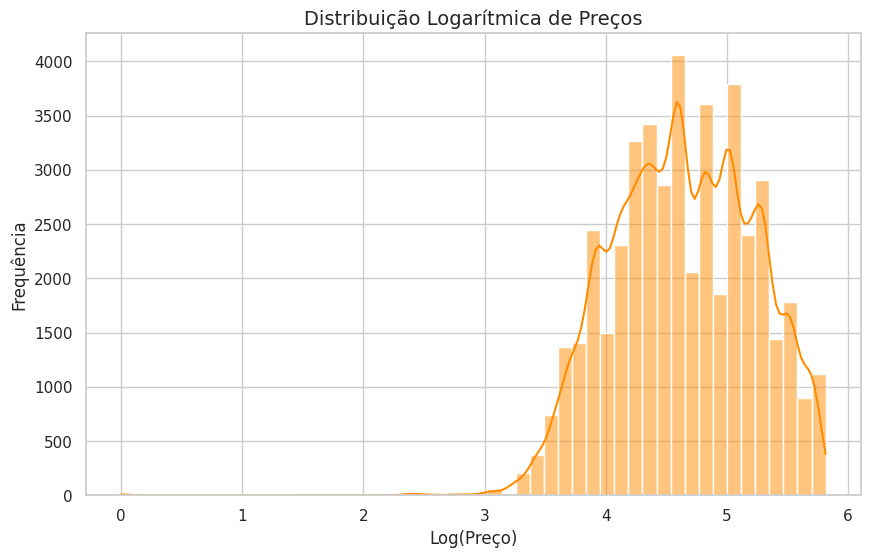

✅ Transformação log aplicada!


In [10]:
# 📉 Aplicando Logaritmo
df["price_log"] = np.log1p(df["price"])

# Visualização da distribuição
plt.figure(figsize=(10,6))
sns.histplot(df['price_log'], bins=50, kde=True, color='darkorange')
plt.title("Distribuição Logarítmica de Preços", fontsize=14)
plt.xlabel("Log(Preço)", fontsize=12)
plt.ylabel("Frequência", fontsize=12)
plt.show()

print("✅ Transformação log aplicada!")


## ⚖️ Normalização das Variáveis Numéricas  

        Utilizamos **StandardScaler** para padronizar as features numéricas (exceto `price_log`).
        

In [11]:
# 📏 Normalizando Variáveis Numéricas
scaler = StandardScaler()

colunas_numericas = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
colunas_numericas.remove("price_log")  # Excluímos price_log da normalização

df[colunas_numericas] = scaler.fit_transform(df[colunas_numericas])

print("✅ Normalização aplicada!")


✅ Normalização aplicada!


## ✅ Conclusões e Insights

        📌 **Principais melhorias:**  
        - **Valores ausentes tratados** para evitar perdas de dados.  
        - **Outliers removidos** para reduzir impacto de valores extremos.  
        - **Novas features criadas**, melhorando a capacidade preditiva.  
        - **Transformação log aplicada** na variável alvo para melhor distribuição.  
        - **Normalização das variáveis**, garantindo escalas homogêneas.  
---  
        